In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import joblib

In [2]:
# Load dataset
df = pd.read_csv('crime_emergencies.csv')
df.columns = [c.strip() for c in df.columns]

In [5]:
df.head()

Date  Year   Time Day_of_Week          Barangay   Latitude  \
0  09/10/2025  2025   0:22      Friday  San Mateo (Imok)  14.031094   
1  01/11/2022  2022  21:42      Sunday             III-E  14.106046   
2  24/05/2020  2020  22:01   Wednesday      II-C (Unson)  14.080902   
3  24/07/2020  2020  18:35      Sunday             VII-D  14.090744   
4  03/07/2025  2025   4:06   Wednesday   VI-D (Lakeside)  14.050497   

    Longitude Weather  Crime_Type       Crime_Cause Severity  Arrests  \
0  121.333158   Sunny  Harassment             Other      Low        2   
1  121.312662   Sunny  Harassment           Alcohol   Medium        3   
2  121.281272   Sunny       Theft  Personal Dispute     High        3   
3  121.320815   Sunny     Robbery      Unemployment   Medium        0   
4  121.347081  Cloudy     Assault     Gang Activity     High        2   

   Response_Time  Incident_Duration  
0             30                113  
1             30                116  
2              9                 69  
3              9                 19  
4             16                107

In [3]:
df.columns

Index(['Date', 'Year', 'Time', 'Day_of_Week', 'Barangay', 'Latitude',
       'Longitude', 'Weather', 'Crime_Type', 'Crime_Cause', 'Severity',
       'Arrests', 'Response_Time', 'Incident_Duration'],
      dtype='object')

In [6]:
df.shape

(1500, 14)

In [7]:
# Define features and target
X = df[['Year', 'Barangay', 'Crime_Type', 'Crime_Cause']]
y = df['Severity'].apply(lambda x: 1 if x in ['Medium', 'High'] else 0)  # 1 for severe, 0 for low

In [8]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Year']),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['Barangay', 'Crime_Type', 'Crime_Cause'])
    ]
)

In [9]:
# Logistic Regression pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [10]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [11]:
# Train model
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Barangay', 'Crime_Type',
                                                   'Crime_Cause'])])),
                ('classifier', LogisticRegression())])

In [12]:
# Make predictions
y_pred = pipe.predict(X_test)
print("=== Logistic Regression - Classification Report ===")
print(classification_report(y_test, y_pred, digits=4))

=== Logistic Regression - Classification Report ===
              precision    recall  f1-score   support

           0     0.4118    0.0452    0.0814       155
           1     0.6582    0.9661    0.7830       295

    accuracy                         0.6489       450
   macro avg     0.5350    0.5056    0.4322       450
weighted avg     0.5733    0.6489    0.5413       450



=== Logistic Regression - Confusion Matrix ===
[[  7 148]
 [ 10 285]]


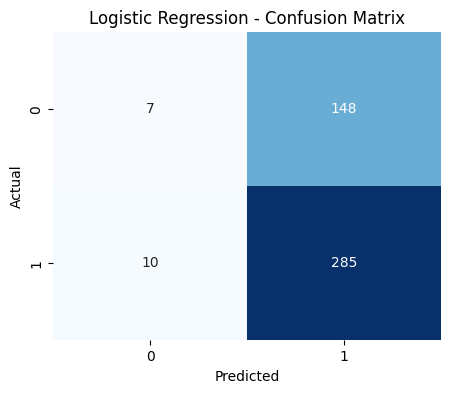

In [13]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("=== Logistic Regression - Confusion Matrix ===")
print(cm)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

=== Logistic Regression - ROC AUC: 0.4698 ===


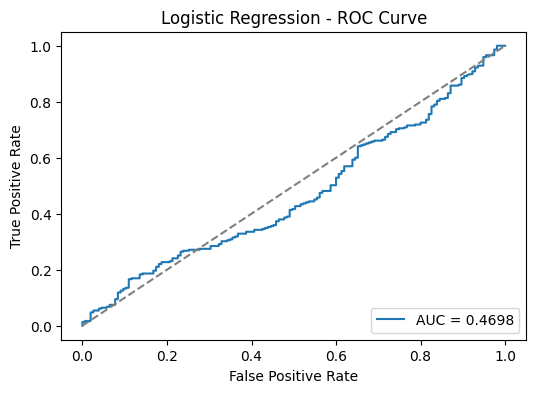

In [14]:
# ROC Curve
y_proba = pipe.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
print(f"=== Logistic Regression - ROC AUC: {roc_auc:.4f} ===")
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression - ROC Curve")
plt.legend(loc='lower right')
plt.show()

In [15]:
# Save model
joblib.dump(pipe, "crime_predictor_lr.pkl")
print("Saved model to crime_predictor_lr.pkl")

Saved model to crime_predictor_lr.pkl
